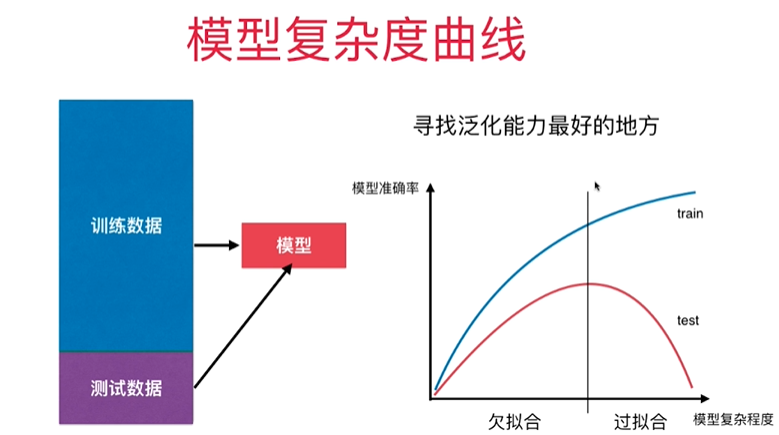

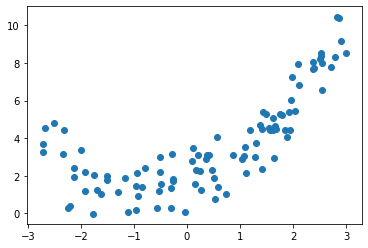

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(X, y)
plt.show()

## 学习曲线

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [4]:
X_train.shape

(75, 1)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = [ ]
test_score = [ ]
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict[:i]))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

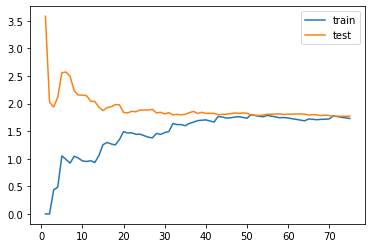

In [7]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()
plt.show()

In [15]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    
    train_score = [ ]
    test_score = [ ]
    
    for i in range(1, 76):
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict[:i]))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train) + 1)],
                                 np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train) + 1)],
                                np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train) + 1, 0, 4])
    plt.show()

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

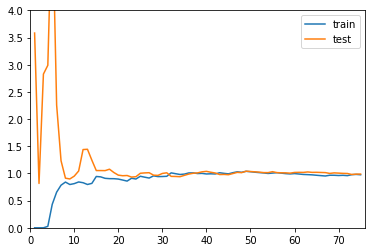

In [17]:
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

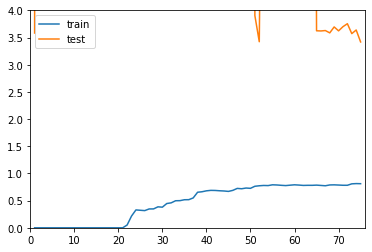

In [18]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

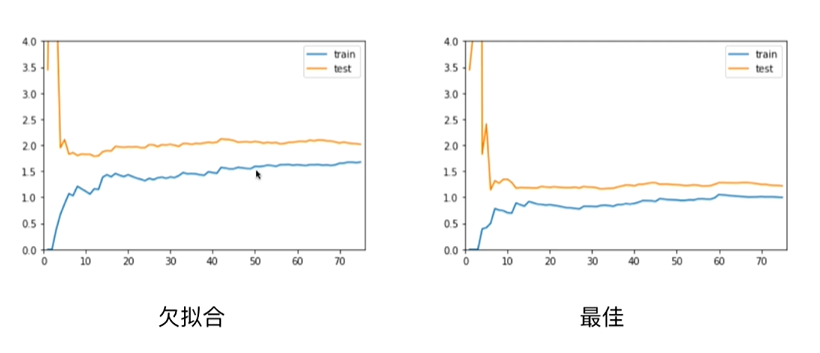

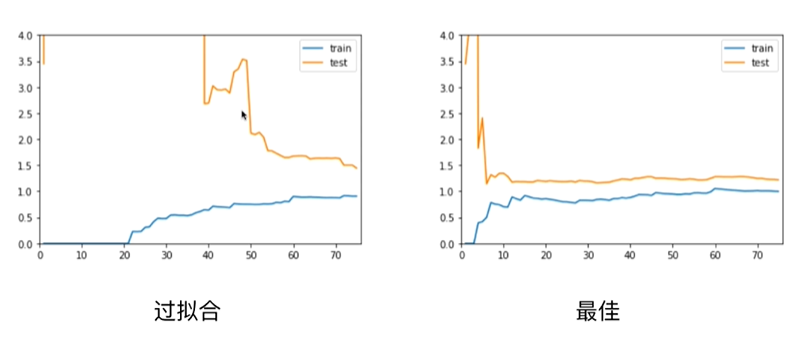